In [125]:
import pydot
import matplotlib.pyplot as plt
import time
import math
import random
#import networkx as nx


# Step 1

## Uploading the data

In [126]:
def get_data(dot_file_path):
    '''Returns the nodes, edges (both in pydot format), a list with all the nodes and another with all the edges, and also a dic with (edge):weigth
    '''
     #= 'Datasets/LesMiserables.dot'
    with open(dot_file_path, 'r') as dot_file:
        dot_data = dot_file.read()
    graph = pydot.graph_from_dot_data(dot_data)

    nodes = graph[0].get_nodes()
    edges = graph[0].get_edges()
    
    node_list = [node.get_name() for node in nodes]
    edge_list = [(edge.get_source(), edge.get_destination()) for edge in edges]
    weights = {}
    if edges[0].get_attributes()!={}:
        name= str(list(edges[0].get_attributes().keys())[0])
        weights = {(edge.get_source(), edge.get_destination()):float(edge.get_attributes()[name]) for edge in edges}

    return nodes,edges,node_list,edge_list,weights
#
# ans = get_data('Datasets/JazzNetwork.dot')
# print(ans[-1])
#nodes,edges,node_list,edge_list,weights = get_data('Datasets/LesMiserables.dot')
#print(('1','40') in edge_list)
# print(len(node_list)**3) #nodes
# print(len(edge_list))
# print(len(edge_list)*len(node_list)) #edges
# print()
# Nodes:  77 
#Edges:  254
#Total:  33982

## Tree Layout

### Counting the number of children/parents for each node

In [127]:
#COUNTING THE NUMBER OF CHILD NODES FOR EACH NODE
def f_childs(file_name_name):  
    '''Returns the count of child nodes [0] and a list of them [1] for all nodes
    ''' 
    nodes = get_data(file_name_name)[0]
    edges = get_data(file_name_name)[1]
    node_child_count = {node.get_name(): 0 for node in nodes}
    node_childs = {node.get_name(): [] for node in nodes}
    for edge in edges:
        source = edge.get_source()
        destination = edge.get_destination()
        if source in node_child_count:
            node_child_count[source] += 1 
            node_childs[source].append(destination) #comment
    return node_child_count, node_childs

#Count
#print(f_childs('Datasets/LesMiserables.dot')[1])
#print(sum(list(f_childs('Datasets/LesMiserables.dot')[0].values())))
#child_11,child_25,child_26 = f_childs('Datasets/LesMiserables.dot')[1]['11'],f_childs('Datasets/LesMiserables.dot')[1]['25'],f_childs('Datasets/LesMiserables.dot')[1]['26']
#print('CHILD')
#print('11: ',child_11)
#print('25: ',child_25)
#print('26": ',child_26)

#List      
#print(f_childs('Datasets/LesMiserables.dot')[1])

def f_parents(file_name_name):
    '''Returns the count of parent nodes [0] and a list of them [1] for all nodes
    '''
    nodes = get_data(file_name_name)[0]
    edges = get_data(file_name_name)[1]
    node_parent_count = {node.get_name(): 0 for node in nodes}
    node_parents = {node.get_name(): [] for node in nodes}
    for edge in edges:
        source = edge.get_source()
        destination = edge.get_destination()
        if destination in node_parent_count:
            node_parent_count[destination] += 1 
            node_parents[destination].append(source)
    return node_parent_count, node_parents

#Count
#print(f_parents('Datasets/LesMiserables.dot')[0]['11'])
#parent_27 = f_parents('Datasets/LesMiserables.dot')[1]['27']
#print("PARENT")
#print('27: ', parent_27)
#List      
#print(f_parents('Datasets/LesMiserables.dot')[1])

def f_edges(file_name):
    '''Returns the count of edges [0] and a list of them [1] for all nodes
    '''
    nodes = get_data(file_name)[0]
    edges = get_data(file_name)[1]
    node_edges_count = {node.get_name(): 0 for node in nodes}
    node_edges = {node.get_name(): [] for node in nodes}
    
    parents = f_parents(file_name)[1]
    childs = f_childs(file_name)[1]

    for node,l_parents in parents.items():
        for parent in l_parents:
            node_edges_count[node] +=1
            node_edges[node].append(parent)
    
    for node,l_childs in childs.items():
        for child in l_childs:
            node_edges_count[node] +=1
            node_edges[node].append(child)
    return node_edges_count,node_edges

#print(f_edges('Datasets/LesMiserables.dot')[1])
#print(f_parents('Datasets/LesMiserables.dot')[1])

#edges = f_edges('Datasets/LesMiserables.dot')
#parents = f_parents('Datasets/LesMiserables.dot')

#print(edges == parents)
#print(edges[0])

### Organizing the nodes throughout the graph, getting their coordinates for the tree layout

In [128]:
def tree_layout(file):
    '''First layout we implemeted
    '''
    total = 0
    n=0
    graph = get_data(file)
    nodes = graph[0]
    edges = graph[1]
    node_positions = {node.get_name(): (0, 0) for node in nodes}
    done_nodes= []
    node_child_count = f_childs(file)[0]
    node_childs = f_childs(file)[1]
    #lonely_nodes_y = -4
    
    for edge in edges:
        n+=1
        l_m = []
        m=0
        #print(edge)#.get_source())
    #    print(node_childs[str(edge.get_destination())])
        parent_x = node_positions[str(edge.get_source())][0]
        parent_y = node_positions[str(edge.get_source())][1]
        step = 3#random.choice([2,3])

        #nnodes with only one child
        if len(node_childs[str(edge.get_source())]) == 1 and int(edge.get_destination()) not in done_nodes:# and int(edge.get_destination()) not in done_nodes:
            #print(edge)
            #random.choice([2,3])
            child_x = parent_x + step
            child_y = parent_y
            node_positions[edge.get_destination()] = (child_x, child_y)
            done_nodes.append(int(edge.get_destination()))
        
        #nodes with more than one node
        elif len(node_childs[str(edge.get_source())]) > 1 and int(edge.get_destination()) not in done_nodes:
            if len(node_childs[str(edge.get_source())])%2 != 0:
                max_y = (node_child_count[str(edge.get_source())]-1)*3
            else:
                max_y = (node_child_count[str(edge.get_source())]-1)*3+1
            for child in node_childs[str(edge.get_source())]:
                m+=1
                child_x = parent_x + step
                child_y = parent_y + max_y
                node_positions[child] = (child_x, child_y)
                max_y -=8
                done_nodes.append(int(edge.get_destination()))
            l_m.append(m)
            total += m
        total+=n
        #elif len(node_childs[str(edge.get_source())]) == 0 and len(node_childs[str(edge.get_destination())]) == 0:
        #    node_positions[child]

        #elif len([done_node for done_node in done_nodes if done_node == edge.get_destination()])==1:
        #    child_x += 1               
        
    return node_positions,n,l_m,total

#pos,n,m,total = tree_layout('Datasets/LesMiserables.dot')
#print("Edges: ",n, '\n',"Nodes: ",m, '\n',"Total: ",total,)
#f_childs(nodes,edges)[1]['17']

### Improved version of the Tree layout

Get the nodes that have the same parent and are directly connected to each other

In [129]:
def common_parents(file_name):
    '''Returns a dic with all the nodes as keys and as values the number of common parents
    '''
    nodes,edges,node_list,edge_list,weights = get_data(file_name)
    ans = {node:[] for node in node_list}
    count = {node:0 for node in node_list}
    for edge1 in edges:
        for edge2 in edges:
            if edge1.get_source() == edge2.get_source() and edge1.get_destination() != edge2.get_destination() and (str(edge1.get_destination()),str(edge2.get_destination())) in edge_list:# and str(edge1.get_destination()) not in ans:
                #ans.append((str(edge1.get_destination()),str(edge2.get_destination())))
                #ans[edge1.get_source()] = []
                ans[edge1.get_source()].append((str(edge1.get_destination()),str(edge2.get_destination())))
   
    for node,edges in ans.items():
        for edge in edges:
            #print(edge)
            count[edge[1]] += 1
    return count

#common_parents('Datasets/LesMiserables.dot')

In [130]:
def tree_layout_improv(file):
    '''returns the coordinates for each node with the improvment of not having connected siblings in the same vertical line
    '''
    graph = get_data(file)
    nodes = graph[0]
    edges = graph[1]
    node_positions = {node.get_name(): (0, 0) for node in nodes}
    done_nodes= []
    node_child_count = f_childs(file)[0]
    node_childs = f_childs(file)[1]
    
    for edge in edges:
        parent_x = node_positions[str(edge.get_source())][0]
        parent_y = node_positions[str(edge.get_source())][1]
        
        #weights
        position = str(str(edge.get_attributes())).rfind(':')
        if int(position) != -1:
            w = int(str(edge.get_attributes())[position+3:-2])
            if w != 1:
                w = w/10

        #nodes with only one child
        if len(node_childs[str(edge.get_source())]) == 1 and int(edge.get_destination()) not in done_nodes:# and int(edge.get_destination()) not in done_nodes:
            #print(edge)
            step = 3#random.choice([2,3])
            child_x = parent_x + step
            child_y = parent_y
            node_positions[edge.get_destination()] = (child_x, child_y)
            done_nodes.append(int(edge.get_destination()))
            print()
        
        #nodes with more than one node
        elif len(node_childs[str(edge.get_source())]) > 1 and int(edge.get_destination()) not in done_nodes:
            if len(node_childs[str(edge.get_source())])%2 != 0:
                max_y = (node_child_count[str(edge.get_source())]-1)*3
            else:
                max_y = (node_child_count[str(edge.get_source())]-1)*3+1
            for child in node_childs[str(edge.get_source())]:
                step = 3#random.choice([2,3])
                child_x = parent_x + step
                child_y = parent_y + max_y
                node_positions[child] = (child_x, child_y)
                max_y -=8
                done_nodes.append(int(edge.get_destination()))
        #elif len([done_node for done_node in done_nodes if done_node == edge.get_destination()])==1:
        #    child_x += 1
                
    #correcting the child_x in cases where sibling nodes are connected to each other
    for node,count in [(node,count) for node,count in common_parents(file).items() if count != 0]:
        node_positions[node] = (node_positions[node][0]+count/3,node_positions[node][1])
    
    return node_positions

#tree_layout_improv('Datasets/LesMiserables.dot')

### Time complexity of the improved version

In [131]:
def time_complexity(file,layout,tree='BFS',ite=10):
    '''Returnt the average (ite) time complexity of a specific layout'''
    ans = []
    for i in range(ite):
        if layout == 'tree_layout':
            start_time = time.time() 
            result = tree_layout(file)
            end_time = time.time() 
        
        if layout == 'tree_layout_improv':
            start_time = time.time() 
            result = tree_layout_improv(file)
            end_time = time.time() 
        if layout == 'radial':
            start_time = time.time() 
            result = radial(file,tree)
            end_time = time.time() 
         # Record the end time
        elapsed_time = end_time - start_time  # Calculate the elapsed time
        ans.append(elapsed_time)
    print('In average, the layout',layout, 'takes', round(sum(ans)/len(ans), 2),'seconds to implement on the', file,'dataset.') 

#time_complexity('Datasets/LesMiserables.dot','radial',tree='DFS')


### Bonus Task

In [132]:
#HOW TO CREATE THE DEFAULT LAYOUT
def bonus_task(file,layout):
    with open(file, 'r') as dot_file:
        dot_data = dot_file.read()

    # Create a graph object from the .dot data
    graph = pydot.graph_from_dot_data(dot_data)

    # Set the layout algorithm to "dot" (or any other supported layout type)
    graph[0].set_graph_defaults(layout=layout)
    graph[0].set_graph_defaults(layout=layout,)
    # Render the graph with Graphviz
    output_file_path = layout+'.png'
    graph[0].write_png(output_file_path)

# Step 2

### Constructing a BFS tree

In [133]:
def layered_ish(file):
    '''Returns the node positions {node:(x,y) and also the final tree (edges and stuff)
    '''
    total = 0
    n=0
    graph = get_data(file)
    nodes = graph[0]
    #edges = graph[1]
    node_positions = {node.get_name(): (0, 0) for node in nodes}
    done_nodes = set()
    #node_child_count = f_childs(file)[0]
    node_childs = f_childs(file)[1]
    min_y = 0

    for node in nodes:
        done_nodes.add(str(node.get_name()))
        childs = node_childs[str(node.get_name())]
        parent_x = node_positions[str(node.get_name())][0]
        parent_y = node_positions[str(node.get_name())][1]
        step = 3

        if len(node_childs[str(node.get_name())]) == 1 and str(node_childs[str(node.get_name())][0]) not in done_nodes:# and int(edge.get_destination()) not in done_nodes:
            child_x = parent_x + step
            child_y = parent_y
            node_positions[str(node_childs[str(node.get_name())][0])] = (child_x, child_y)
            done_nodes.add(str(node_childs[str(node.get_name())][0]))
            
        elif len(node_childs[str(node.get_name())]) >1:# and node_childs[str(node.get_name())] not in done_nodes:
            new_childs = len([child for child in node_childs[str(node.get_name())] if child not in done_nodes])
            max_y = (new_childs-1)*3
            
            done_childs = []
            for child in [new_child for new_child in node_childs[str(node.get_name())] if new_child not in done_nodes]:
                done_childs.append(child)
                child_x = parent_x + step
                child_y = parent_y + max_y
                
                node_positions[child] = (child_x, child_y)
                done_nodes.add(str(child))
                max_y -= 6

            if len(done_childs)>0:
                min_y = node_positions[done_childs[-1]][1]
    return node_positions

#write_ordered_dic('Datasets/LesMiserables.dot')
# tree = layered_ish('Datasets/LesMiserables.dot')
# tree

In [134]:
def BFS_tree(file):
    '''Returns the BFS tree (edges and stuff) {parent:[childs]}
    '''
    graph = get_data(file)
    nodes = graph[0]
    done_nodes = set()
    node_childs = f_childs(file)[1]
    tree = {node.get_name(): [] for node in nodes}
    
    for node in nodes:
        done_nodes.add(str(node.get_name()))
        done_childs = []
        for child in [new_child for new_child in node_childs[str(node.get_name())] if new_child not in done_nodes]:
            done_childs.append(child)
            done_nodes.add(str(child))
            tree[node.get_name()].append(str(child))    
    final_tree = {i:j for i,j in tree.items() if j!= []}
    return final_tree

#BFS_tree('ordered_LesMiserables.dot')
#BFS_tree('Datasets/LesMiserables.dot')


### Constructing the DFS tree

In [135]:
def tree_layout_DFS(file):
    #returns the coordinates for each node 
    graph = get_data(file)
    nodes = graph[0]
    edges = graph[1]

    node_positions = {node.get_name(): (0, 0) for node in nodes}
    done_nodes= []
    node_child_count = f_childs(file)[0]
    node_childs = f_childs(file)[1]
    visited_nodes = []
    tree = {node.get_name(): [] for node in nodes}
    return dfs(node_positions, 1, node_childs=node_childs, visited_nodes=visited_nodes, edges=edges, tree=tree)



def dfs(node_positions, node, node_childs, visited_nodes, edges, tree, x=0, y=0):
    visited_nodes.append(node)
    parent_x, parent_y = x, y
    
    step_x = 1  # Horizontal step size
    step_y = 2  # Vertical step size

    nchilds = len(node_childs[str(node)])
    if nchilds == 0:
        return node_positions

    child_y = parent_y - step_y
    total_width = step_x * (nchilds - 1)
    start_x = parent_x - total_width / 2
    
    for i, child in enumerate(node_childs[str(node)]):
        if child not in visited_nodes:
            child_x = start_x + i * step_x
            node_positions[str(child)] = (child_x, child_y)

            tree[str(node)].append(child)
            dfs(node_positions, child, node_childs, visited_nodes, edges, tree, child_x, child_y)
    
    final_tree = {i:j for i,j in tree.items() if j!= []}
    return node_positions, final_tree

#print(tree_layout_DFS('Datasets/LesMiserables.dot')[0])
#show_graph('Datasets/LesMiserables.dot','layered_ish' ,'DFS',(18,18))

In [136]:
#HOW TO PLOT A GENERAL GRAPH
def show_graph(file,layout,tree='BFS', dims=(18,18)):
    #nodes,edges = get_data(file)[0],get_data(file)[1]
    edge_list,weigths = get_data(file)[3],get_data(file)[4]
    if layout == 'tree_layout':
        node_positions = tree_layout(file)
        edges = get_data(file)[1]
    if layout == 'tree_layout_improv':
        node_positions = tree_layout_improv(file)
        edges = get_data(file)[1]

    if layout == 'layered_ish':
        node_positions = layered_ish(file)
    
    
    
    if tree == 'BFS' and layout in ['layered_ish','radial']:
        edges_ish = BFS_tree(file)
        edges = []
        for source,l_dest in edges_ish.items():
            for dest in l_dest:
                edges.append((source,dest))
        if layout == 'radial':
            node_positions = radial(file,tree_type='BFS')
    
    # if tree == 'DFS' and layout in ['layered_ish','radial']:
    #     edges_ish = DFS_tree(file)[1]
    #     #print(edges_ish)
    #     edges = []
    #     for source,l_dest in edges_ish.items():
    #         for dest in l_dest:
    #             edges.append((source,dest))
    if tree == 'DFS' and layout in ['layered_ish','radial']:
        tree_org = tree_layout_DFS(file)
        edges_ish = tree_org[1]
        node_positions = tree_org[0]
        edges = []
        for source,l_dest in edges_ish.items():
            for dest in l_dest:
                edges.append((source,dest))
        if layout == 'radial':
            node_positions = radial(file,tree_type='DFS')

    plt.figure(figsize=(dims[0], dims[1]))
    w = 1
    for edge in edges:
        if layout not in ['layered_ish','radial']:
            start_node = edge.get_source()
            end_node = edge.get_destination()
            position = str(str(edge.get_attributes())).rfind(':')
            if int(position) != -1:
                w = int(str(edge.get_attributes())[position+3:-2])
                if w != 1:
                    w = w/10
        else:
            start_node = edge[0]
            end_node = edge[1]
            new_edge = (start_node,end_node)
            if new_edge not in edge_list:
                new_edge = (end_node,start_node)
            if weigths !={}:
                w = weigths[new_edge]
                if w != 1:
                    w=w/10

        start_pos = node_positions[start_node]
        end_pos = node_positions[end_node]
        plt.plot([start_pos[0], end_pos[0]], [start_pos[1], end_pos[1]], 'k-',linewidth=w,zorder = 1) 

    for node, pos in node_positions.items():
        plt.scatter(pos[0], pos[1], color='green', s=200, marker='o', zorder =2)  # Use marker='o' for circle markers
        plt.text(pos[0], pos[1], str(node), fontsize=10, ha='center', va='center')
        
    plt.axis('off')
    plt.gca().set_facecolor('w')
    plt.savefig('Plots/'+tree+'_'+layout+'_plot.png')
    plt.show()
    
#show_graph('Datasets/LesMiserables.dot','tree_layout1',(18,18))
#show_graph('Datasets/LesMiserables.dot','radial',tree = 'DFS')

# Radial Layout

### Sorting the nodes based on their degree and writing the new tree in a .dot file

In [137]:
def f_edges(file_name):
    '''Returns the number and list of edges for each one of the nodes
    '''
    nodes = get_data(file_name)[0]
    edges = get_data(file_name)[1]
    node_edges_count = {node.get_name(): 0 for node in nodes}
    node_edges = {node.get_name(): [] for node in nodes}
    
    parents = f_parents(file_name)[1]
    childs = f_childs(file_name)[1]

    for node,l_parents in parents.items():
        for parent in l_parents:
            node_edges_count[node] +=1
            node_edges[node].append(parent)
    
    for node,l_childs in childs.items():
        for child in l_childs:
            node_edges_count[node] +=1
            node_edges[node].append(child)
    return node_edges_count,node_edges

#final_edges = f_edges('Datasets/LesMiserables.dot')[1]

In [138]:
def sort_nodes_degree(file):
    '''Returns a sorted dictionary containing the nodes, as keys, and a list of it's childs, as values, ordered based on the degree (> to <)
    '''
    return dict(sorted(f_edges(file)[1].items(), key=lambda item: len(item[1]), reverse=True))

# dic = sort_nodes_degree('Datasets/LesMiserables.dot')
# dic

In [139]:
def write_ordered_dic(file,new_file):
    '''writes a new .dot file but with the nodes ordered based of their degree
    '''
    dic = sort_nodes_degree(file)
    nodes_list = get_data(file)[2]
    edge_list = get_data(file)[3]
    weigths = get_data(file)[4]
    done_nodes = set()

    graph = pydot.Dot(graph_type='graph')

    # for node_ish in nodes_list:
    #     node = pydot.Node(node_ish)
    #     graph.add_node(node)
    
    for node_ish,childs in dic.items():
        node = pydot.Node(node_ish)
        if node_ish not in done_nodes:
            graph.add_node(node)
            done_nodes.add(node_ish)
        for child_ish in childs:
            child = pydot.Node(child_ish)
            if child_ish not in done_nodes:
                graph.add_node(child)
                done_nodes.add(child_ish)
            #graph.add_node(child)
            edge_ish = (str(node_ish), str(child_ish) )
            if edge_ish not in edge_list:
                edge_ish = (str(child_ish), str(node_ish))
            w = int(weigths[edge_ish])
            edge = pydot.Edge(str(node_ish), str(child_ish), weight=w)
            graph.add_edge(edge)
    
    graph.write(new_file)

#write_ordered_dic('Datasets/LesMiserables.dot','example.dot')

### Auxiliary functions for the radial layout

In [140]:
def get_key(dictionary, value):
    '''Return the key of a specific value
    '''
    return next((key for key, val in dictionary.items() if value in val), None)

def count_descendants(tree, node_name):
    'returns the number (int) of descendants of a node'
    if node_name not in tree:
        return 0
    
    descendants = 0
    if node_name in tree:
        children = tree[node_name]
        descendants += len(children)  # Add the direct children count
        for child in children:
            descendants += count_descendants(tree, child)
    return descendants

def count_ancestors(tree, node_name):
    'returns the number (int) of ancestors of a node'
    ancestors = 0
    nodes = tree
    key = get_key(tree,node_name)
    #print('key',key)
    if key != None:
        parent = get_key(tree,node_name)
        ancestors += 1           
        ancestors += count_ancestors(tree, parent)
    return ancestors

def f_layers(file,layout='BFS'):
    '''Organizes the nodes based on the layer their own on a list of lists(index = layer)
    '''
    #if layout == 'BFS':
    #    tree = radial(file)[0]
    layers = [[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[],[]]

    if layout == 'BFS':
        tree = BFS_tree(file)
        node_positions = layered_ish(file)
        for node, childs in tree.items():
            for child in childs:
                layer = int(node_positions[child][0]/3)
                layers[layer].append(child)
    if layout == 'DFS':
        tree = tree_layout_DFS(file)[1]
        node_positions = tree_layout_DFS(file)[0]
        for node, childs in tree.items():
            for child in childs:
                layer = -int(node_positions[child][1]/2)
                layers[layer].append(child)
    root = list(tree.keys())[0]
    layers[0].append(root)
    return [layer for layer in layers if layer != []]

#ans_layers =f_layers('Datasets/LesMiserables.dot',layout='DFS')

### Radial Implementation

In [141]:
def radial(file,tree_type = 'BFS',ordesection = False):
    '''returns the nodes\' positions if we apply the radial layout implementation
    '''
    if ordesection != False:
        new_file = write_ordesection_dic(file)
        file = new_file
    data = get_data(file)
    nodes,nodes_list,edge_list,weigths = data[0],data[2],data[3],data[4]
    if tree_type == 'DFS':
        tree = tree_layout_DFS(file)[1]
        layers = f_layers(file,layout='DFS')
    
    elif tree_type == 'BFS':
        tree = BFS_tree(file)
        layers = f_layers(file,layout='BFS')
    node_positions = {node.get_name(): (0, 0) for node in nodes}
    root = list(tree.keys())[0]

    start_angle=0
    for subtree in tree:
        #root = subtree
        angle = 0
        for node in tree[subtree]:
            for i in layers:
                if node in i:
                    layer = layers.index(i)
            #print(layer)
            radius = 3*layer

            parent_x = node_positions[get_key(tree,node)][0]
            parent_y = node_positions[get_key(tree,node)][1]
            #angle for the section for each node
            section = 2*math.pi*(1+count_descendants(tree, subtree))/count_descendants(tree, root)
            #increment between sibling nodes
            increment = 2*math.pi*(count_descendants(tree, node)+1)/count_descendants(tree, root)
            
            if layer > 1 and tree[subtree].index(node)==0:
                #the starting angle must be the parent angle - half of section              
                start_angle = math.acos(parent_x/(3*(layer-1)))-section/2
                if parent_y <0:
                    #acos has domain [0,pi], so we need to fix it where x>pi
                    start_angle = -math.acos(parent_x/(3*(layer-1)))-section/2
                angle+= start_angle
            
            angle+= increment/2
            child_x = math.cos(angle)*radius
            child_y = math.sin(angle)*radius
            angle+= increment/2
            node_positions[node]=(child_x,child_y)
   
    return node_positions


#write_ordesection_dic('Datasets/LesMiserables.dot')
#ans = radial('ordered_LesMiserables.dot',tree_type='DFS')
#radial('Datasets/LesMiserables.dot',tree_type='DFS')


### Exercises

### Take a graph and compute a BFS tree of it


We decided to prune the layout algorithm we came up with on the first Step of this assignment, in order to get the layered layout, not only as the layout to use for all the tasks from Step 2, but also as way to get a representation of our BFS implementation. However, we ended up realizing that this layout is not the best one, given the amount of space wasted. That can be seen in Figure XXX. It's important to mention the fact that this algorithm is not finished, but if we indeed implemented it completely, the amount of wasted space would be even worse.

In [142]:
#write_ordered_dic('Datasets/LesMiserables.dot','ordered_LesMiserables.dot')
#show_graph('Datasets/LesMiserables.dot','layered_ish')

### Take a graph and compute a DFS tree of it

In order to get a DFS, we...

In [143]:
#show_graph('Datasets/LesMiserables.dot','layered_ish',tree = 'DFS')

### Implement radial layout

Time complexity

In [144]:
#time_complexity('Datasets/LesMiserables.dot','radial',tree='BFS',ite=10)

In [145]:
#time_complexity('Datasets/LesMiserables.dot','radial',10)
#time_complexity('ordered_LesMiserables.dot','radial',10)

radial BFS: 8.57

Implementation

We implemented the radial layout both on the Les Misérables network and to Jazz network, both using BFS

In [146]:
#show_graph('Datasets/LesMiserables.dot','radial',tree = 'BFS')

In [147]:
#show_graph('Datasets/JazzNetwork.dot','radial',tree = 'BFS')

In [148]:
#show_graph('Datasets/JazzNetwork.dot','radial',tree = 'DFS')

Comments

This visualization is not great for the Les Misérables network, given that the central node is node 1, and this node only has one incident edge. One way to fix this, is by ordering the nodes in a way that the node in the center is the one with the highest degree.
When it comes to the Jazz network, the BFS representation looks considerably good.

In [149]:
#write_ordered_dic('Datasets/LesMiserables.dot','ordered_LesMiserables.dot')
#show_graph('ordered_LesMiserables.dot','radial')

### Compare the quality of the visualizations for the BFS and DFS

In [150]:
#show_graph('Datasets/LesMiserables.dot','radial',tree = 'BFS')

In [151]:
#show_graph('Datasets/LesMiserables.dot','radial',tree = 'DFS')

We focused on the LesMirables dataset. Both radial layouts, using BFS or DFS trees, have quite decent representations. However, the radial layout with BFS returns a layout where the hierarchical relationships between nodes are more obvious and clear. On the DFS version it's hard to understand where the central node ('1') is actually located, whereas on the BFS it's extremely obvious.
We therefore conclude that the BFS version of this layout algorithm results in better results. 

In [152]:
#show_graph('ordered_LesMiserables.dot','radial',tree = 'BFS')

In [153]:
#nodes,edges,node_list,edge_list,weights = get_data('Datasets/LesMiserables.dot')[0],get_data('Datasets/LesMiserables.dot')[1],get_data('Datasets/LesMiserables.dot')[2],get_data('Datasets/LesMiserables.dot')[3],get_data('Datasets/LesMiserables.dot')[4]

In [154]:
#edge_list

In [155]:
# Example usage
num_nodes = 10
nodes = [i for i in range(0,10)]
edges = [(0, 1), (1, 2), (2, 3), (3, 0), (0, 4), (1, 5), (2, 6), (3, 7), (4, 5), (5, 6), (6, 7), (7, 4), (4, 8), (5, 9)]

def create_pydot_graph(nodes, edges, filename):
    graph = pydot.Dot(graph_type='graph')

    # Add nodes to the graph
    for node in nodes:
        graph.add_node(pydot.Node(node))

    # Add edges to the graph
    for edge in edges:
        src, dest = edge
        graph.add_edge(pydot.Edge(src, dest))

    # Write the graph to a .dot file
    graph.write(filename)

#create_pydot_graph(nodes, edges,'test_force.dot')

# Step 3

convergence signal!!! 416


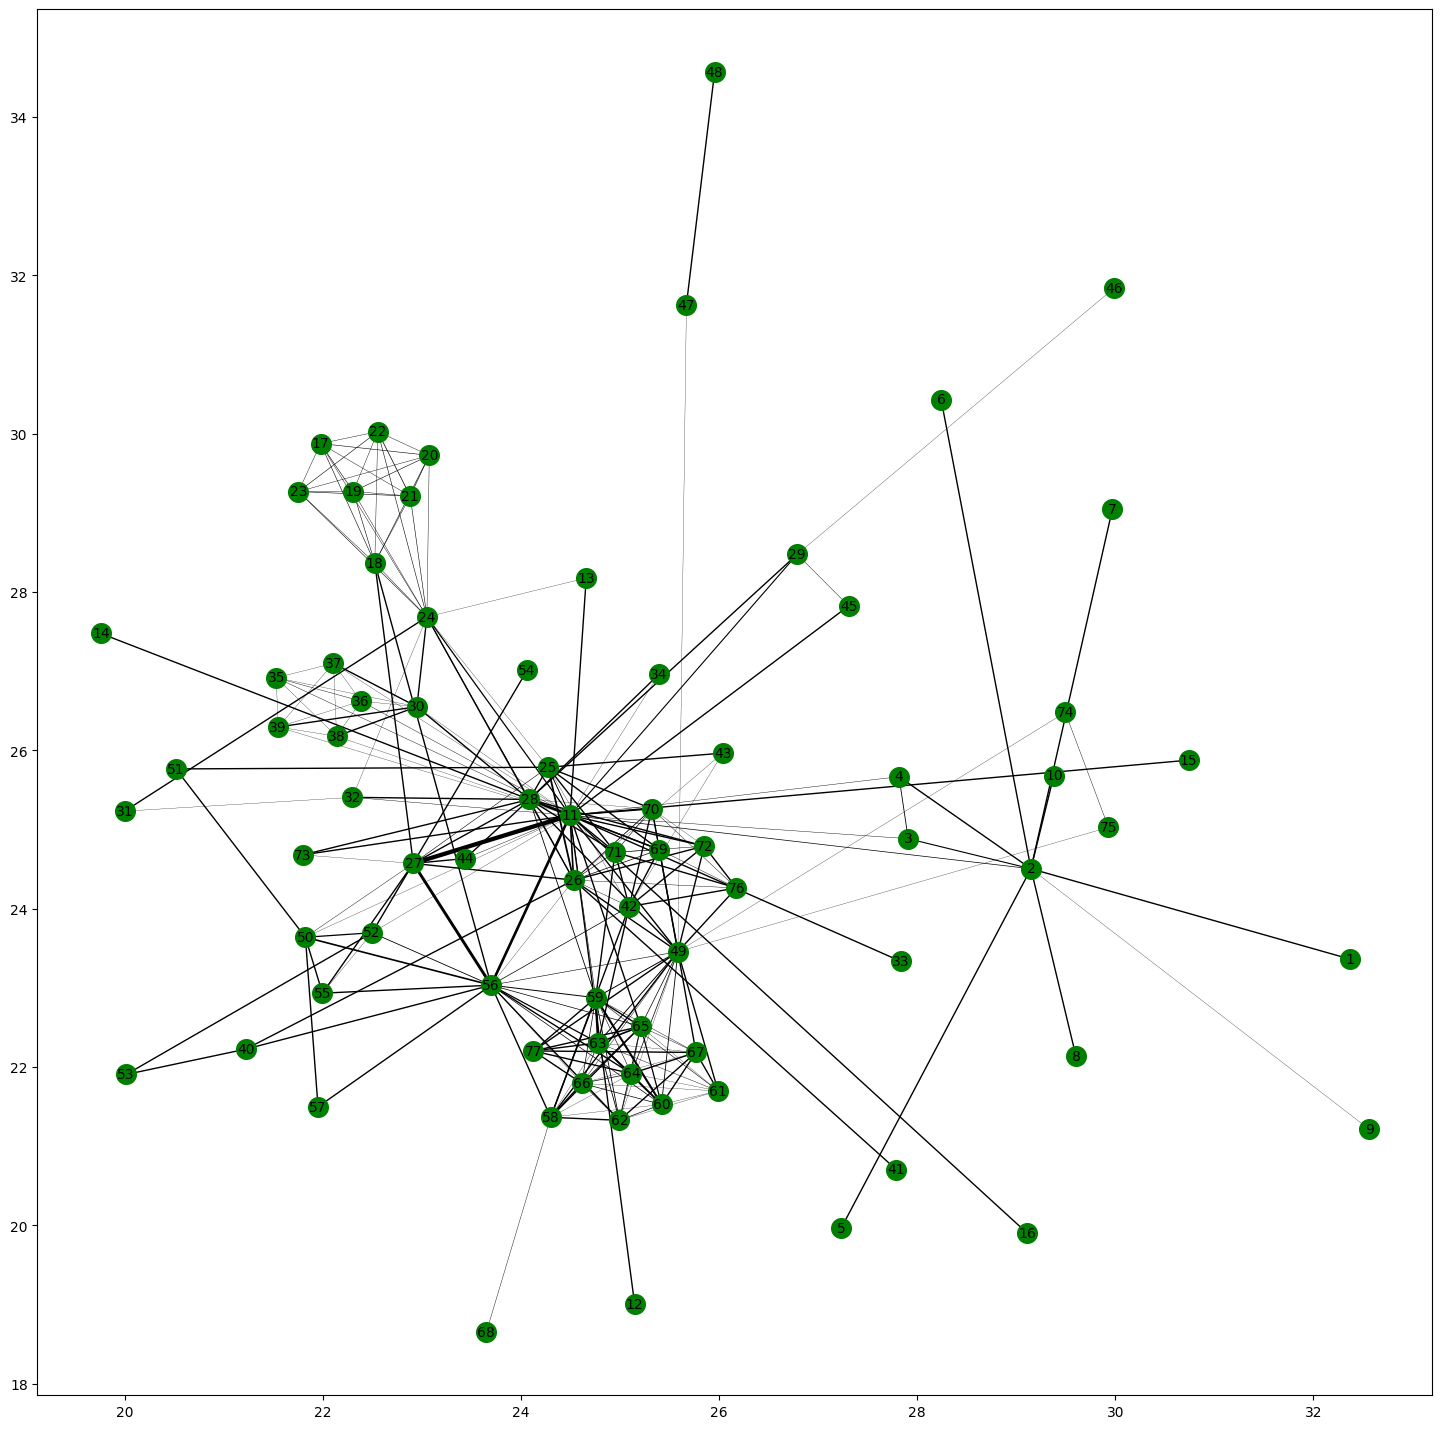

In [180]:
# Using Convergence Criteria

def working_spring_embedder_hugo(file, max_iterations=1000, plot='No', c_spring=2, c_rep=1, l=1, convergence_threshold=0.005): #con_thre can be changed
    nodes, edges, node_list, edge_list, weights = get_data(file)[0], get_data(file)[1], get_data(file)[2], get_data(file)[3], get_data(file)[4]
    node_positions = {node.get_name(): (random.uniform(0, 50), random.uniform(0, 50)) for node in nodes}

    l_changes = []
    iteration = 0
    while iteration < max_iterations:
        changes = []
        for u in nodes:
            force_x = 0
            force_y = 0
            pu = node_positions[u.get_name()]

            for v in nodes:
                if u.get_name() != v.get_name():
                    pv = node_positions[v.get_name()]
                    dist = math.sqrt((pu[0]-pv[0])**2 + (pu[1]-pv[1])**2)
                    if dist == 0:
                        dist = 1

                    # Spring
                    if (u.get_name(), v.get_name()) in edge_list or (v.get_name(), u.get_name()) in edge_list:
                        constant = c_spring*math.log(dist)/l
                        force_x += (pv[0]-pu[0])*constant/dist
                        force_y += (pv[1]-pu[1])*constant/dist
                    # Repulsion
                    else:
                        constant = c_rep/dist**2
                        force_x += (pu[0]-pv[0])*constant/dist
                        force_y += (pu[1]-pv[1])*constant/dist
            changes.append(math.sqrt((force_x*0.01)**2 + (force_y*0.01)**2))
            new_x = pu[0] + force_x*0.01
            new_y = pu[1] + force_y*0.01
            node_positions[u.get_name()] = (new_x,new_y)

        average_movement = sum(changes) / len(changes)
        l_changes.append(average_movement)
        
        # Check convergence
        if average_movement < convergence_threshold:
            print("convergence signal!!!", iteration) #Why movement? Provides a measure of how much the layout is changing, common in Force directed layouts
            break
        
        iteration += 1

    if plot != 'No':
        plt.figure(figsize=(18, 18))         
        for edge in edges:
            start_node = edge.get_source()
            end_node = edge.get_destination()
            position = str(str(edge.get_attributes())).rfind(':')
            if int(position) != -1:
                w = int(str(edge.get_attributes())[position+3:-2])
                if w != 1:
                    w = w/10
            start_pos = node_positions[start_node]
            end_pos = node_positions[end_node]
            plt.plot([start_pos[0], end_pos[0]], [start_pos[1], end_pos[1]], 'k-',linewidth=w,zorder = 1) 

        for node, pos in node_positions.items():
            plt.scatter(pos[0], pos[1], color='green', s=200, marker='o', zorder =2)  # vse marker='o' for circle markers
            plt.text(pos[0], pos[1], str(node), fontsize=10, ha='center', va='center')
        #plt.axis('off')
        plt.gca().set_facecolor('w')
        #plt.savefig('Plots/'+tree+'_'+layovt+'_plot.png')
        plt.show()


    return node_positions, l_changes


l_f_v = working_spring_embedder_hugo('Datasets/LesMiserables.dot', max_iterations=1000, plot='Yes')

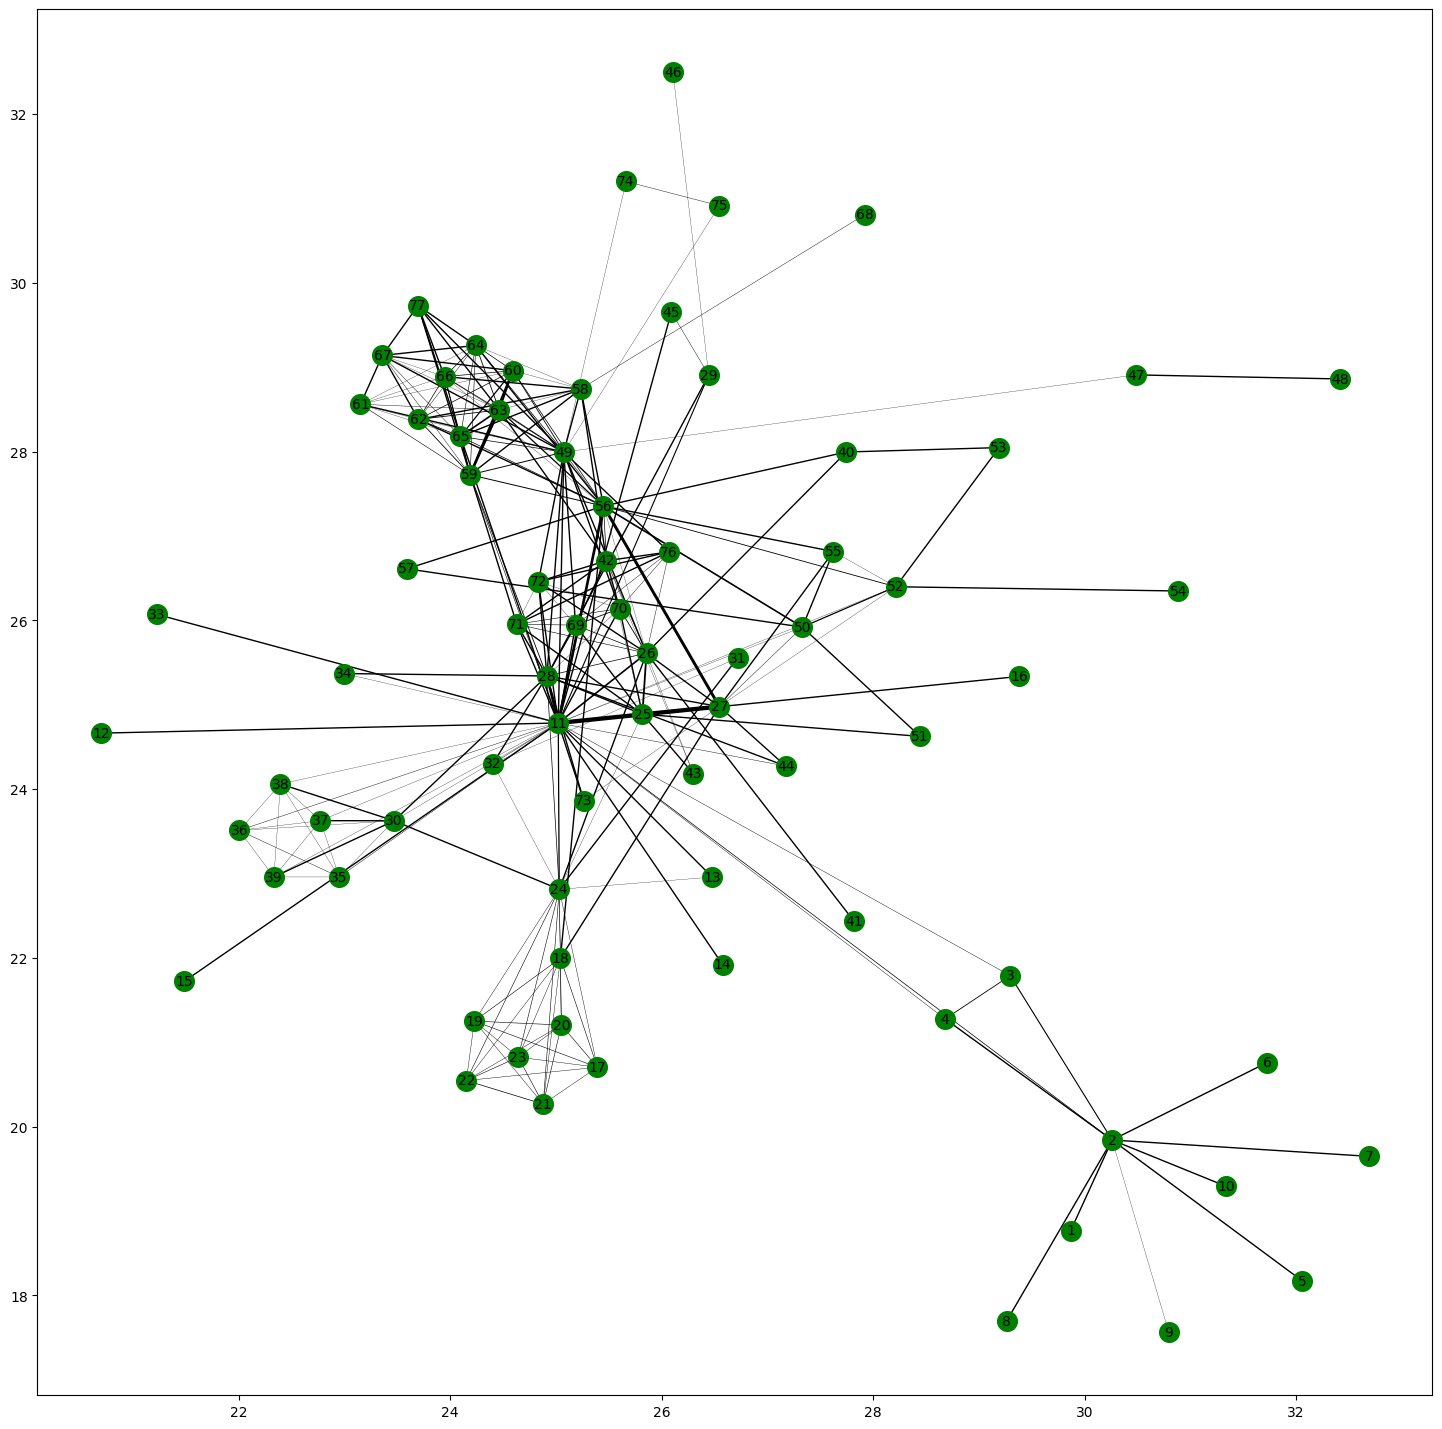

In [168]:
def working_spring_embedder(file, ite, plot='No', c_spring=2, c_rep=1, l=1):
    nodes, edges, node_list, edge_list, weights = get_data(file)[0], get_data(file)[1], get_data(file)[2], get_data(file)[3], get_data(file)[4]
    node_positions = {node.get_name(): (random.uniform(0, 50), random.uniform(0, 50)) for node in nodes} #Randomly initialize the positions of nodes.

    l_changes = []
    for _ in range(ite): #here maybe using convergence criteria instead of implementing  a certain number of interactions
        changes = []
        for u in nodes:
            force_x = 0
            force_y = 0
            pu = node_positions[u.get_name()]

            for v in nodes:
                if u.get_name() != v.get_name():
                    pv = node_positions[v.get_name()]
                    dist = math.sqrt((pu[0]-pv[0])**2 + (pu[1]-pv[1])**2)
                    if dist == 0:
                        dist = 1

                    # Spring
                    if (u.get_name(), v.get_name()) in edge_list or (v.get_name(), u.get_name()) in edge_list:
                        constant = c_spring*math.log(dist)/l
                        force_x += (pv[0]-pu[0])*constant/dist
                        force_y += (pv[1]-pu[1])*constant/dist
                    # Repulsion
                    else:
                        constant = c_rep/dist**2
                        force_x += (pu[0]-pv[0])*constant/dist
                        force_y += (pu[1]-pv[1])*constant/dist
            changes.append(math.sqrt((force_x*0.1)**2 + (force_y*0.1)**2))
            #new_x = pu[0] + force_x*0.1 #The learning rate controls the step size
            #new_y = pu[1] + force_y*0.1
            new_x = pu[0] + force_x*0.01 #The learning rate controls the step size
            new_y = pu[1] + force_y*0.01
            node_positions[u.get_name()] = (new_x,new_y)
        l_changes.append(sum(changes)/len(changes))
    if plot != 'No':
        plt.figure(figsize=(18, 18))         
        for edge in edges:
            start_node = edge.get_source()
            end_node = edge.get_destination()
            position = str(str(edge.get_attributes())).rfind(':')
            if int(position) != -1:
                w = int(str(edge.get_attributes())[position+3:-2])
                if w != 1:
                    w = w/10
            start_pos = node_positions[start_node]
            end_pos = node_positions[end_node]
            plt.plot([start_pos[0], end_pos[0]], [start_pos[1], end_pos[1]], 'k-',linewidth=w,zorder = 1) 

        for node, pos in node_positions.items():
            plt.scatter(pos[0], pos[1], color='green', s=200, marker='o', zorder =2)  # vse marker='o' for circle markers
            plt.text(pos[0], pos[1], str(node), fontsize=10, ha='center', va='center')
        #plt.axis('off')
        plt.gca().set_facecolor('w')
        #plt.savefig('Plots/'+tree+'_'+layovt+'_plot.png')
        plt.show()

    return node_positions, l_changes

l_f_v = working_spring_embedder('Datasets/LesMiserables.dot',ite = 1000,plot='Yes')#,c_spring=2, c_rep=1,l=1)

# Using Convergence Criteria?

In [172]:
l_f_v[1] #node movements as criteria

[2.955903772880362,
 2.929066380450907,
 2.8891363659097813,
 2.846774914343005,
 2.8093918664911492,
 2.775179360041997,
 2.7392592641331737,
 2.697437954001205,
 2.655485415307347,
 2.6170465008456514,
 2.5814076346754447,
 2.5448054029220684,
 2.508133128083381,
 2.4726823632547115,
 2.4467718447076545,
 2.4035746982165875,
 2.364696821934375,
 2.3309023596327685,
 2.294476976917908,
 2.255719257638598,
 2.217238710385641,
 2.179621469084159,
 2.1452202329558525,
 2.1103018769081783,
 2.074556066903949,
 2.0385136058736015,
 2.0024958968586906,
 1.9673473621136683,
 1.9337933153698277,
 1.8988540255607573,
 1.8649831819356568,
 1.8321610311644998,
 1.7961885944441358,
 1.7528384394803933,
 1.7268385463957605,
 1.7065756304038735,
 1.6727764100375504,
 1.6310927376618634,
 1.594364534611415,
 1.559382510920712,
 1.5237274921401198,
 1.4901140203799954,
 1.4602354048137507,
 1.4341982592247307,
 1.407328339646438,
 1.382147085737766,
 1.352014188306084,
 1.3207231427124893,
 1.2905230

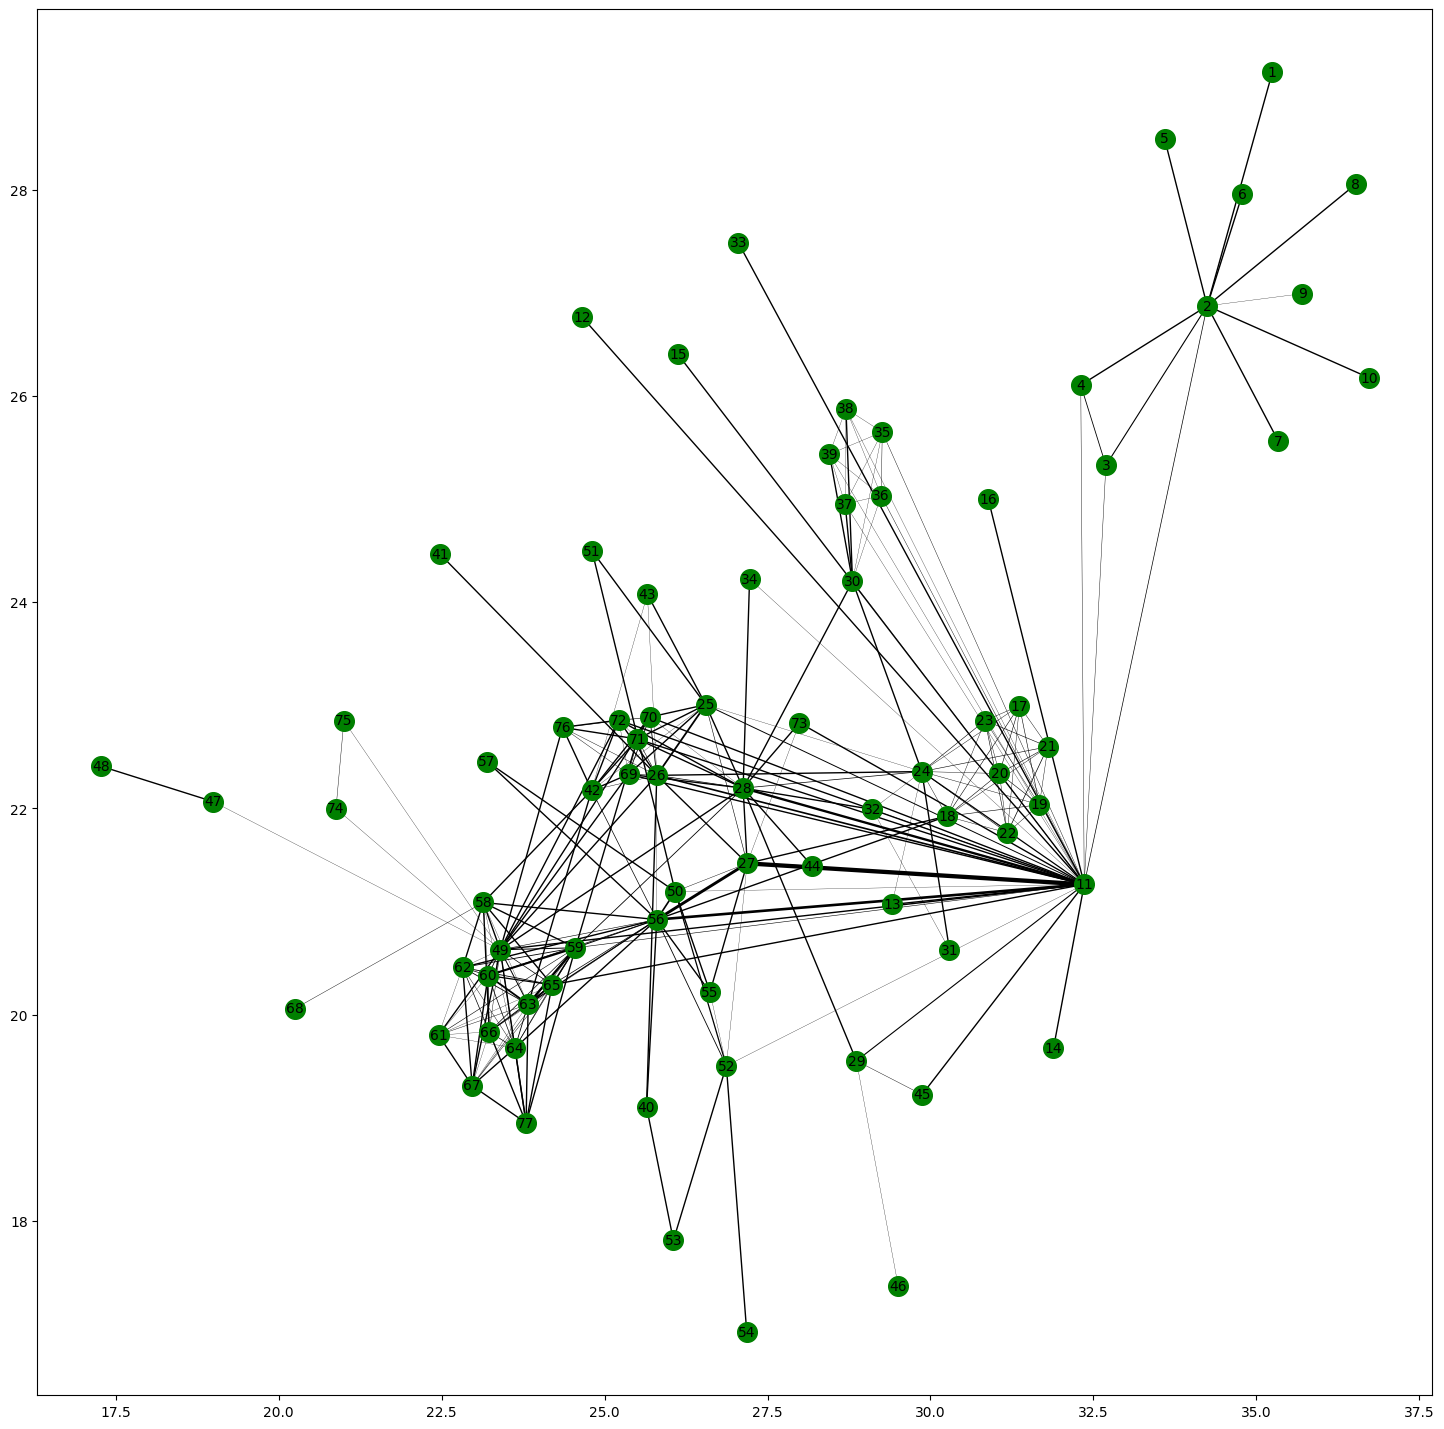

In [158]:
def spring_embedder14(file, ite, plot='No', c_spring=2, c_rep=1, l=1):
    nodes, edges, node_list, edge_list, weights = get_data(file)[0], get_data(file)[1], get_data(file)[2], get_data(file)[3], get_data(file)[4]

    # Initialize random positions for nodes
    node_positions = {node.get_name(): (random.uniform(0, 50), random.uniform(0, 50)) for node in nodes}

    # Main loop for layout optimization
    l_changes = []
    for _ in range(ite):
        changes = []
        for u in nodes:
            force_x = 0
            force_y = 0
            pu = node_positions[u.get_name()]

            for v in nodes:
                if u.get_name() != v.get_name():
                    pv = node_positions[v.get_name()]
                    dist = math.sqrt((pu[0]-pv[0])**2 + (pu[1]-pv[1])**2)
                    if dist == 0:
                        dist = 1

                    # Spring force
                    if (u.get_name(), v.get_name()) in edge_list or (v.get_name(), u.get_name()) in edge_list:
                        constant = c_spring*math.log(dist/l)
                        force_x += (pv[0]-pu[0])*constant/dist
                        force_y += (pv[1]-pu[1])*constant/dist
                    # Repulsion force
                    else:
                        constant = c_rep/dist**2
                        force_x += (pu[0]-pv[0])*constant/dist
                        force_y += (pu[1]-pv[1])*constant/dist
            changes.append(math.sqrt((force_x*0.1)**2 + (force_y*0.1)**2))
            # Update node positions based on forces
            new_x = pu[0] + force_x*0.1
            new_y = pu[1] + force_y*0.1
            node_positions[u.get_name()] = (new_x,new_y)
        l_changes.append(max(changes))
    
    if plot != 'No':
        plt.figure(figsize=(18, 18))         
        for edge in edges:
            start_node = edge.get_source()
            end_node = edge.get_destination()
            position = str(str(edge.get_attributes())).rfind(':')
            if int(position) != -1:
                w = int(str(edge.get_attributes())[position+3:-2])
                if w != 1:
                    w = w/10
            start_pos = node_positions[start_node]
            end_pos = node_positions[end_node]
            plt.plot([start_pos[0], end_pos[0]], [start_pos[1], end_pos[1]], 'k-',linewidth=w,zorder = 1) 

        for node, pos in node_positions.items():
            plt.scatter(pos[0], pos[1], color='green', s=200, marker='o', zorder =2)  # vse marker='o' for circle markers
            plt.text(pos[0], pos[1], str(node), fontsize=10, ha='center', va='center')
        #plt.axis('off')
        plt.gca().set_facecolor('w')
        #plt.sauefig('Plots/'+tree+'_'+layovt+'_plot.png')
        plt.show()

    return node_positions, l_changes

l_f_v = spring_embedder14('Datasets/LesMiserables.dot',ite = 1000,plot='Yes')#,c_spring=2, c_rep=1,l=1)

In [159]:
l_f_v[1]

[15.11254547013561,
 7.345088667979741,
 6.214876227229231,
 4.55522260846793,
 8.596569584589098,
 2.752614069676365,
 2.3784031145660878,
 9.727830305128332,
 2.9912298386974534,
 181.517053136188,
 11.370566073131767,
 10.273102939197342,
 10.141327935533484,
 10.00131584972979,
 9.852897992650659,
 9.697532679441531,
 9.530845388550798,
 9.358562236802626,
 9.166246650547137,
 267.8729596070438,
 13.408053289935214,
 13.270273843793325,
 13.132643078616912,
 51.609786082195406,
 12.858290892686991,
 12.698570511725443,
 12.53177611276155,
 12.350148169656414,
 12.161451403410405,
 11.958006168377029,
 11.740669647716224,
 11.50304603983469,
 11.24514651659129,
 10.96426033759398,
 10.657500084341848,
 10.315176820732407,
 9.93669164795187,
 9.50108704646356,
 9.005951438777897,
 8.953069618901447,
 8.976321838199802,
 9.53478764622207,
 9.528523044430818,
 9.700314942101217,
 9.586535498806999,
 9.667517674487438,
 9.671173413171022,
 9.806185437218026,
 9.959008205236145,
 10.0953

In [160]:
def spring_embedder1(file,ite,plot = 'No',c_spring=2,c_rep=1,l=1):
    #l(e) --> ideal spring lenght for edge e
    #pv = (xv, yv) -->position of node v
    #||pu - pv|| -->euclidean distance between u and v
    #pupv --> unit vecor pointing from u to v
    #Values are appropiate for most graphs
    #c_srping = 2, l(e)=l= 1, c_rep = 1

    nodes,edges,node_list,edge_list,weights = get_data(file)[0],get_data(file)[1],get_data(file)[2],get_data(file)[3],get_data(file)[4]
    w=1
    initial_positions = {node.get_name():(int(random.uniform(0, 50)),int(random.uniform(0, 50))) for node in nodes}
    # forces = {}
    # for u in nodes:
    #     for v in nodes:
    l_f_v = []
    for i in range(ite):
        #print('o')
        for u in nodes:
            forces = []
            pu = initial_positions[u.get_name()]
            for v in nodes:
                if u.get_name() != v.get_name():
    
                    pv = initial_positions[v.get_name()]
                    dist = math.sqrt((pu[0]-pv[0])**2+(pu[1]-pv[1])**2)

                    if dist ==0:
                        dist = 1
                    pupv = ((pv[0]-pu[0])/dist,(pv[1]-pu[1])/dist)
                    #spring
                    if (u.get_name(),v.get_name()) in edge_list or (v.get_name(),u.get_name()) in edge_list:
                        constant = c_spring*math.log(dist)/l
                        force = (pupv[0]*constant*pupv[0], pupv[1]*constant*pupv[1])
                        forces.append(force)
                    #rep
                    else:
                        constant = c_rep/dist**2
                        force = (pupv[0]*constant*pupv[0], pupv[1]*constant*pupv[1])
                        forces.append(force)
            force_x = sum([force[0] for force in forces])
            force_y = sum([force[1] for force in forces])
            f_v = (force_x,force_y)
            l_f_v.append(math.sqrt(f_v[0]**2+f_v[1]**2))
            
            new_x1 = initial_positions[u.get_name()][0]+force_x*0.2
            new_y1 = initial_positions[u.get_name()][1]+force_y*0.2
            initial_positions[u.get_name()] = (new_x1,new_y1)

            # new_x2 = initial_positions[v.get_name()][0]-force_x*0.8
            # new_y2 = initial_positions[v.get_name()][1]-force_y*0.8
            # initial_positions[v.get_name()] = (new_x2,new_y2)
    #f_springs = [force for force]
    #return forces
    #return sum(forces)
    if plot != 'No':
        plt.figure(figsize=(18, 18))         
        for edge in edges:
            start_node = edge.get_source()
            end_node = edge.get_destination()
            position = str(str(edge.get_attributes())).rfind(':')
            if int(position) != -1:
                w = int(str(edge.get_attributes())[position+3:-2])
                if w != 1:
                    w = w/10
            start_pos = initial_positions[start_node]
            end_pos = initial_positions[end_node]
            plt.plot([start_pos[0], end_pos[0]], [start_pos[1], end_pos[1]], 'k-',linewidth=w,zorder = 1) 

        for node, pos in initial_positions.items():
            plt.scatter(pos[0], pos[1], color='green', s=200, marker='o', zorder =2)  # Use marker='o' for circle markers
            plt.text(pos[0], pos[1], str(node), fontsize=10, ha='center', va='center')
        plt.axis('off')
        plt.gca().set_facecolor('w')
        #plt.savefig('Plots/'+tree+'_'+layout+'_plot.png')
        plt.show()

    return max(l_f_v)


#spring_embedder1('test_force.dot',1000,plot='t')

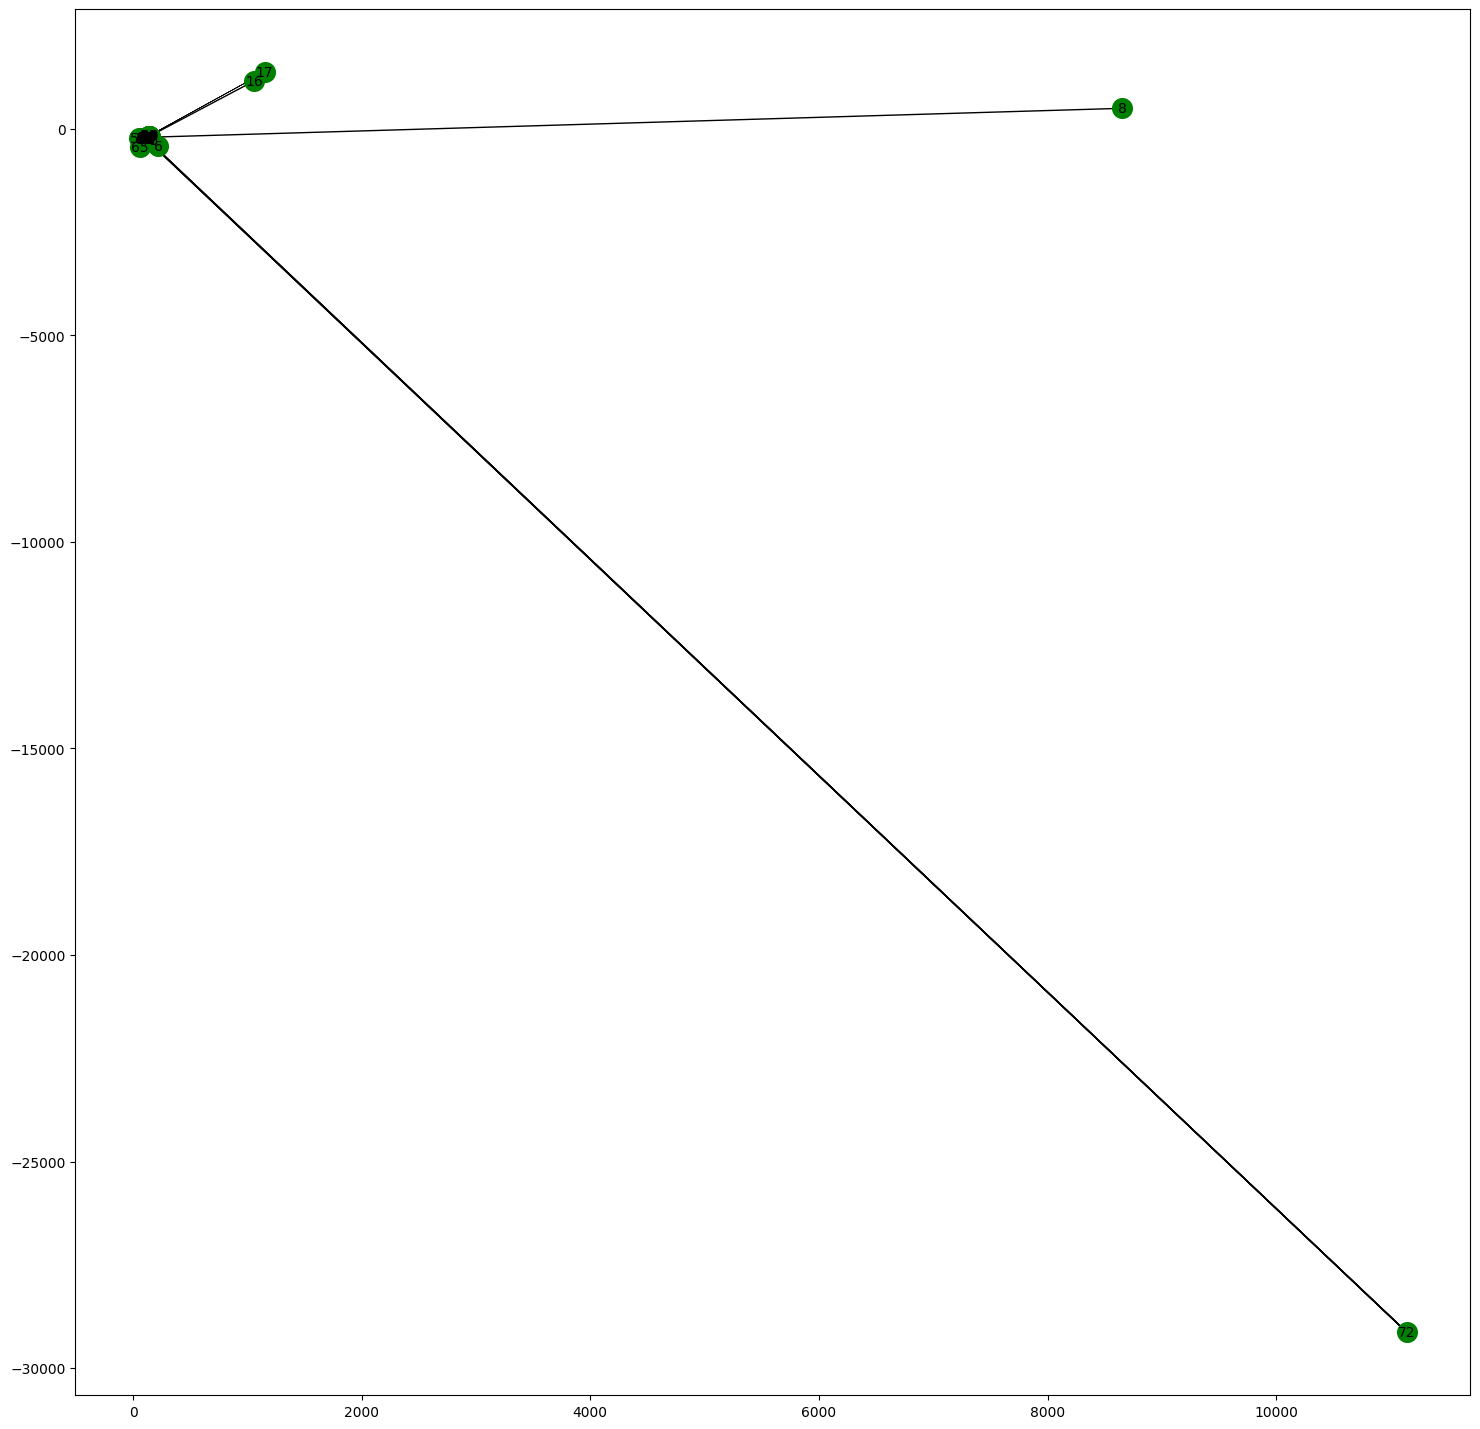

In [161]:
def spring_embedder(file, ite, epsilon, plot='No', c_spring=2, c_rep=1, l=1,delta=0.1):
    '''Implementation of the baasic spring_embedder
    file: .dot file with the data
    ite: number of iterations that we want to repeate the computation of new positions for each node
    epsilon: parameteres used to also tell when to stop, it corresponds to the maximum value of the forces
    c_spring: constant for computing the force between adjacent nodes
    c_rep: constant for computing the force between NON-adjacent nodes
    l(e): ideal spring lenght for edge e
    delta: step for updating the node position with delta*force
    '''
    nodes, edges, node_list, edge_list, weights = get_data(file)[0], get_data(file)[1], get_data(file)[2], get_data(file)[3], get_data(file)[4]   
    node_positions = {node.get_name(): (random.uniform(0, 50), random.uniform(0, 50)) for node in nodes}
    w=1
    l_f_v = {node.get_name():1 for node in nodes}
    i=0
    #max_changes = [50]
    while i<ite and max(l_f_v.values()) > epsilon:# and min(max_changes)>1:
        
        for v in nodes:
            changes = []
            force_x = 0
            force_y = 0
            pv = node_positions[v.get_name()]

            for u in nodes:
                if v.get_name() != u.get_name():
                    pu = node_positions[u.get_name()]
                    #dist from pu to pv is = to dist from pv to pu
                    dist = math.sqrt((pv[0]-pu[0])**2 + (pv[1]-pu[1])**2)
                    if dist == 0:
                        dist = 1

                    #spring
                    if (v.get_name(), u.get_name()) in edge_list or (u.get_name(), v.get_name()) in edge_list:
                        constant = c_spring*math.log(dist/l)
                        
                    #rep
                    else:
                        constant = c_rep/(dist**2)
                    
                    force_x += (pu[0]-pv[0])/dist*constant
                    force_y += (pu[1]-pv[1])/dist*constant
                    #changes.append(math.sqrt((force_x * delta)**2+(force_y * delta)**2))
            #l_f_v[v.get_name()] = math.sqrt(force_x**2+force_y**2)
            
            
            #change = math.sqrt((force_x * delta)**2+(force_y * delta)**2)
            #max_changes.append(sum(changes)/len(changes))

            v_new_x = pv[0] + force_x * delta
            v_new_y = pv[1] + force_y * delta
            node_positions[v.get_name()] = (v_new_x, v_new_y)
        
        i+=1

    if plot != 'No':
        plt.figure(figsize=(18, 18))         
        for edge in edges:
            start_node = edge.get_source()
            end_node = edge.get_destination()
            position = str(str(edge.get_attributes())).rfind(':')
            if int(position) != -1:
                w = int(str(edge.get_attributes())[position+3:-2])
                if w != 1:
                    w = w/10
            start_pos = node_positions[start_node]
            end_pos = node_positions[end_node]
            plt.plot([start_pos[0], end_pos[0]], [start_pos[1], end_pos[1]], 'k-',linewidth=w,zorder = 1) 

        for node, pos in node_positions.items():
            plt.scatter(pos[0], pos[1], color='green', s=200, marker='o', zorder =2)  # vse marker='o' for circle markers
            plt.text(pos[0], pos[1], str(node), fontsize=10, ha='center', va='center')
        #plt.axis('off')
        plt.gca().set_facecolor('w')
        #plt.sauefig('Plots/'+tree+'_'+layovt+'_plot.png')
        plt.show()
    return node_positions#,l_f_v,i,max_changes
l_f_v = spring_embedder('Datasets/LesMiserables.dot',ite = 1000,epsilon =0.01,plot='Yes')#,c_spring=2, c_rep=1,l=1)
#l_f_v = spring_embedder('test_force.dot',100,0.01,plot='N',c_spring=1.5, c_rep=1.5,l=1)
#l_f_v[1]

In [162]:
l_f_v

{'1': (146.16711506209805, -199.7035844454401),
 '2': (145.6095645148502, -204.81942652500405),
 '3': (129.59624068637666, -211.49744360849527),
 '4': (128.74367433534414, -211.8953220311527),
 '5': (144.61097638401708, -202.4219837902266),
 '6': (220.40219239147532, -418.9429996354207),
 '7': (145.2418915843963, -200.2144277185621),
 '8': (8654.701378389334, 495.2504166521785),
 '9': (143.4062858239977, -203.79686767586517),
 '10': (137.00780499627678, -172.8449324019104),
 '11': (113.72084795167743, -227.55371077160933),
 '12': (112.96054609549229, -224.0110114912558),
 '13': (116.5222897850972, -213.1327046818776),
 '14': (111.22630899459946, -226.1673607704284),
 '15': (112.21445729355408, -224.48644772867166),
 '16': (1060.9067522577527, 1159.624577698036),
 '24': (128.54252378668707, -195.1082369977501),
 '25': (114.3937120850445, -234.50341592401128),
 '26': (115.43441475444808, -241.30048586667021),
 '27': (111.33483815902952, -228.97128309574254),
 '28': (114.00554519716142, -

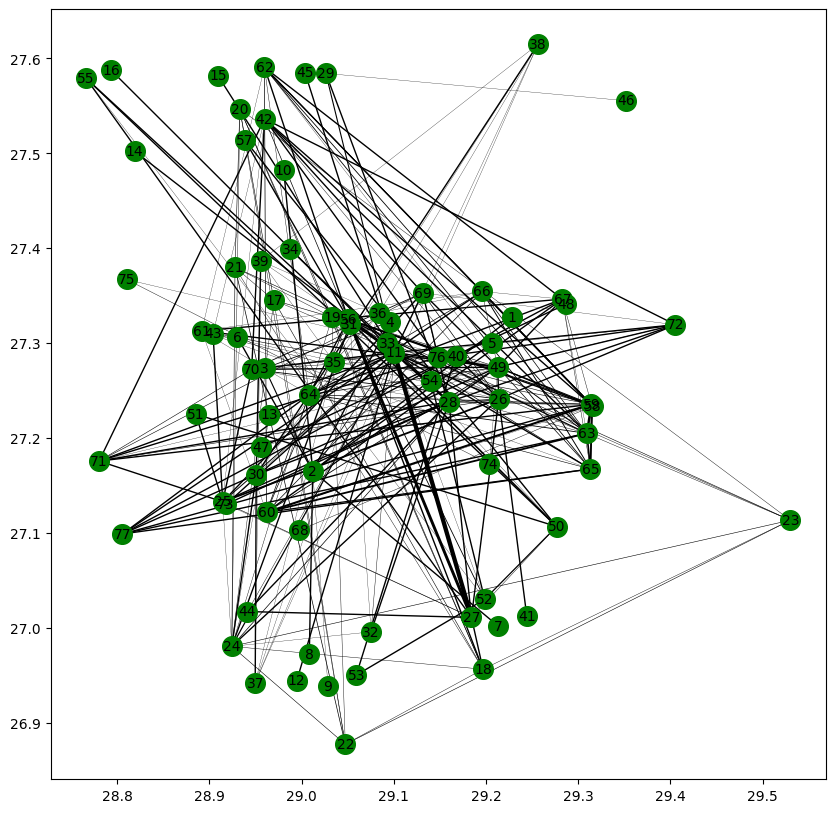

{'1': (29.22845537784862, 27.327278140302052),
 '2': (29.01219976594264, 27.165231903011136),
 '3': (28.96011072055131, 27.273516924317622),
 '4': (29.09557024331615, 27.32252949925987),
 '5': (29.20677367302281, 27.300078634343606),
 '6': (28.930108589011443, 27.30676431004125),
 '7': (29.21336956403317, 27.001959164099674),
 '8': (29.00843793750504, 26.972491590545705),
 '9': (29.0285813342941, 26.93896898182844),
 '10': (28.98068515209165, 27.481982108357137),
 '11': (29.1005222722528, 27.29012976096343),
 '12': (28.994791252986776, 26.944473715276875),
 '13': (28.96516896391953, 27.224772244012936),
 '14': (28.81902754987838, 27.502193203522037),
 '15': (28.909323557945047, 27.581759723021616),
 '16': (28.793225224854748, 27.587754154582314),
 '24': (28.924339301431576, 26.98064351218691),
 '25': (28.91450288552597, 27.1329611329472),
 '26': (29.21395822397043, 27.24125217688774),
 '27': (29.184289734938368, 27.011171919884582),
 '28': (29.159853766551947, 27.238240302125842),
 '29

In [163]:

def spring_embedder12(file, ite, epsilon, plot='No', c_spring=2, c_rep=1, l=1, delta=0.4):
    nodes, edges, node_list, edge_list, weights = get_data(file)[0], get_data(file)[1], get_data(file)[2], get_data(file)[3], get_data(file)[4]   
    node_positions = {node.get_name(): (random.uniform(0, 50), random.uniform(0, 50)) for node in nodes}
    l_f_v = {node.get_name(): 1 for node in nodes}
    i = 0

    while i < ite and max(l_f_v.values()) > epsilon:
        l_f_v = {}
        for v in nodes:
            force_x = 0
            force_y = 0
            pv = node_positions[v.get_name()]
            l_f_v[v.get_name()] = 0

            for u in nodes:
                if v.get_name() != u.get_name():
                    pu = node_positions[u.get_name()]
                    dist = math.sqrt((pv[0] - pu[0]) ** 2 + (pv[1] - pu[1]) ** 2)
                    if dist == 0:
                        dist = 1

                    # Spring
                    if (v.get_name(), u.get_name()) in edge_list or (u.get_name(), v.get_name()) in edge_list:
                        constant = c_spring * math.log(dist / l)
                    # Repulsion
                    else:
                        constant = c_rep / (dist ** 2)

                    force_x += (pu[0] - pv[0]) * constant
                    force_y += (pu[1] - pv[1]) * constant

            # Normalize force vector
            force_magnitude = math.sqrt(force_x ** 2 + force_y ** 2)
            if force_magnitude != 0:
                force_x /= force_magnitude
                force_y /= force_magnitude

            l_f_v[v.get_name()] = force_magnitude

            v_new_x = pv[0] + force_x * delta
            v_new_y = pv[1] + force_y * delta
            node_positions[v.get_name()] = (v_new_x, v_new_y)
        
        i += 1

    if plot != 'No':
        plt.figure(figsize=(10, 10))
        for edge in edges:
            start_node = edge.get_source()
            end_node = edge.get_destination()
            position = str(edge.get_attributes()).rfind(':')
            if position != -1:
                w = int(str(edge.get_attributes())[position+3:-2])
                if w != 1:
                    w = w / 10
            start_pos = node_positions[start_node]
            end_pos = node_positions[end_node]
            plt.plot([start_pos[0], end_pos[0]], [start_pos[1], end_pos[1]], 'k-', linewidth=w, zorder=1)

        for node, pos in node_positions.items():
            plt.scatter(pos[0], pos[1], color='green', s=200, marker='o', zorder=2)
            plt.text(pos[0], pos[1], str(node), fontsize=10, ha='center', va='center')
        
        plt.gca().set_facecolor('w')
        plt.show()
    
    return node_positions

spring_embedder12('Datasets/LesMiserables.dot',1000,0.01,plot='Yes')#,c_spring=2, c_rep=1,l=1)

In [164]:
# max(l_f_v[1].values())
# l_f_v

In [165]:
def frunch_reingold(file, ite, epsilon, plot='No', c_spring=2, c_rep=1, l=1,delta=0.1):
    '''Implementation of the baasic frunch&reingold
    file: .dot file with the data
    ite: number of iterations that we want to repeate the computation of new positions for each node
    epsilon: parameteres used to also tell when to stop, it corresponds to the maximum value of the forces
    c_spring: constant for computing the force between adjacent nodes
    c_rep: constant for computing the force between NON-adjacent nodes
    l(e): ideal spring lenght for edge e
    delta: step for updating the node position with delta*force
    '''
    nodes, edges, node_list, edge_list, weights = get_data(file)[0], get_data(file)[1], get_data(file)[2], get_data(file)[3], get_data(file)[4]   
    initial_positions = {node.get_name(): (random.uniform(0, 50), random.uniform(0, 50)) for node in nodes}
    w=1
    l_f_v = {node.get_name():1 for node in nodes}
    i=0
    max_changes = [50]
    while i<ite and max(l_f_v.values()) > epsilon:# and min(max_changes)>1:
        
        for v in nodes:
            changes = []
            force_x = 0
            force_y = 0
            pv = initial_positions[v.get_name()]

            for u in nodes:
                if v.get_name() != u.get_name():
                    pu = initial_positions[u.get_name()]
                    dist = math.sqrt((pv[0]-pu[0])**2 + (pv[1]-pu[1])**2)
                    if dist == 0:
                        dist = 1

                    #spring
                    if (v.get_name(), u.get_name()) in edge_list or (u.get_name(), v.get_name()) in edge_list:
                        constant = (dist**2)/l
                        force_x += (pu[0]-pv[0])*constant
                        force_y += (pu[1]-pv[1])*constant
                    #rep
                    #else:
                    constant = l**2/dist
                    force_x += (pv[0] - pu[0]) * constant
                    force_y += (pv[1] - pu[1]) * constant
                    changes.append(math.sqrt((force_x * delta)**2+(force_y * delta)**2))
            l_f_v[v.get_name()] = math.sqrt(force_x**2+force_y**2)
            
            
            change = math.sqrt((force_x * delta)**2+(force_y * delta)**2)
            max_changes.append(sum(changes)/len(changes))

            v_new_x = pv[0] + force_x * delta
            v_new_y = pv[1] + force_y * delta
            initial_positions[v.get_name()] = (v_new_x, v_new_y)
        
        i+=1

    if plot != 'No':
        plt.figure(figsize=(18, 18))         
        for edge in edges:
            start_node = edge.get_source()
            end_node = edge.get_destination()
            position = str(str(edge.get_attributes())).rfind(':')
            if int(position) != -1:
                w = int(str(edge.get_attributes())[position+3:-2])
                if w != 1:
                    w = w/10
            start_pos = initial_positions[start_node]
            end_pos = initial_positions[end_node]
            plt.plot([start_pos[0], end_pos[0]], [start_pos[1], end_pos[1]], 'k-',linewidth=w,zorder = 1) 

        for node, pos in initial_positions.items():
            plt.scatter(pos[0], pos[1], color='green', s=200, marker='o', zorder =2)  # vse marker='o' for circle markers
            plt.text(pos[0], pos[1], str(node), fontsize=10, ha='center', va='center')
        #plt.axis('off')
        plt.gca().set_facecolor('w')
        #plt.sauefig('Plots/'+tree+'_'+layovt+'_plot.png')
        plt.show()
    return initial_positions,l_f_v,i,max_changes
l_f_v = frunch_reingold('Datasets/LesMiserables.dot',1000,0.01,plot='Yes',c_spring=2, c_rep=1,l=1*math.sqrt(50*50/77))
#l_f_v = frunch&reingold('test_force.dot',100,0.01,plot='N',c_spring=1.5, c_rep=1.5,l=1)

OverflowError: (34, 'Result too large')

In [ ]:
l = 1*math.sqrt(50*50/77)
l

5.698028822981898

# TRASH

In [ ]:
def BFS_tree(file,plot = 'No'):
    total = 0
    n=0
    graph = get_data(file)
    nodes = graph[0]
    #edges = graph[1]
    node_positions = {node.get_name(): (0, 0) for node in nodes}
    done_nodes = set()
    #node_child_count = f_childs(file)[0]
    node_childs = f_childs(file)[1]
    tree = {node.get_name(): [] for node in nodes}
    min_y = 0

    for node in nodes:
        done_nodes.add(str(node.get_name()))
        childs = node_childs[str(node.get_name())]
        parent_x = node_positions[str(node.get_name())][0]
        parent_y = node_positions[str(node.get_name())][1]
        step = 3

        if len(node_childs[str(node.get_name())]) == 1 and str(node_childs[str(node.get_name())][0]) not in done_nodes:# and int(edge.get_destination()) not in done_nodes:
            child_x = parent_x + step
            child_y = parent_y
            node_positions[str(node_childs[str(node.get_name())][0])] = (child_x, child_y)
            done_nodes.add(str(node_childs[str(node.get_name())][0]))
            tree[node.get_name()].append(str(node_childs[str(node.get_name())][0]))
            
        elif len(node_childs[str(node.get_name())]) >1:# and node_childs[str(node.get_name())] not in done_nodes:
            new_childs = len([child for child in node_childs[str(node.get_name())] if child not in done_nodes])
            max_y = (new_childs-1)*3
            
            done_childs = []
            for child in [new_child for new_child in node_childs[str(node.get_name())] if new_child not in done_nodes]:
                done_childs.append(child)
                child_x = parent_x + step
                child_y = parent_y + max_y
                
                node_positions[child] = (child_x, child_y)
                done_nodes.add(str(child))
                max_y -= 6
                tree[node.get_name()].append(str(child))

            if len(done_childs)>0:
                min_y = node_positions[done_childs[-1]][1]

    # if plot != 'No':
    #     plt.figure(figsize=(18, 18))

    #     reached_dests = set()
    #     for edge in edges:
    #         if node_positions[str(edge.get_source())][0] != node_positions[str(edge.get_destination())][0] and str(edge.get_destination()) not in reached_dests:
    #             start_node = edge.get_source()
    #             end_node = edge.get_destination()
    #             start_pos = node_positions[start_node]
    #             end_pos = node_positions[end_node]

    #             position = str(str(edge.get_attributes())).rfind(':')
    #             if int(position) != -1:
    #                 w = int(str(edge.get_attributes())[position+3:-2])
    #                 if w != 1:
    #                     w = w/10
    #         plt.plot([start_pos[0], end_pos[0]], [start_pos[1], end_pos[1]], 'k-',linewidth=w,zorder = 1) 
    #         reached_dests.add(str(edge.get_destination()))
    #     for node, pos in node_positions.items():
    #         plt.scatter(pos[0], pos[1], color='green', s=200, marker='o', zorder =2)  # Use marker='o' for circle markers
    #         plt.text(pos[0], pos[1], str(node), fontsize=10, ha='center', va='center')
    #     plt.axis('off')
    #     plt.gca().set_facecolor('w')
    #     plt.savefig('BFS_tree_plot.png')
    #     plt.show()
    final_tree = {i:j for i,j in tree.items() if j!= []}
    return node_positions,final_tree

#write_ordered_dic('Datasets/LesMiserables.dot')
#tree = BFS_tree('example.dot',plot='YEs')[1]
#tree = BFS_tree('Datasets/LesMiserables.dot')

#tree = BFS_tree('example.dot')
#show_graph('Datasets/LesMiserables.dot','BFS_tree',(18,18))
# #print("Edges: ",n, '\n',"Nodes: ",m, '\n',"Total: ",total,)
# #f_childs(nodes,edges)[1]['17']

In [ ]:
#OLD
def hugo_radial(file,ordesection = False):
    if ordesection != False:
        new_file = write_ordesection_dic(file)
        file = new_file
    data = get_data(file)
    nodes,nodes_list,edge_list,weigths = data[0],data[2],data[3],data[4]
    tree = BFS_tree(file)[1]
    node_positions = {node.get_name(): (0, 0) for node in nodes}
    done_nodes= []
    #radius = 3
    root = list(tree.keys())[0]
    layers = f_layers(file)
    angle = 0
    start_angle=0
    for subtree in tree:
        #root = subtree
        for node in tree[subtree]:
            for i in layers:
                if node in i:
                    layer = layers.index(i)
            #print(layer)
            radius = 3*layer

            parent_x = node_positions[get_key(tree,node)][0]
            parent_y = node_positions[get_key(tree,node)][1]
            
            descendants = count_descendants(tree, node)
            if layer <= 1: 
                if descendants >0:
                    increment = 2*math.pi*(descendants+1)/count_descendants(tree, root)
                else:
                    increment = 2*math.pi/count_descendants(tree, root)

            if layer > 1:             
                section = 2*math.pi*(1+count_descendants(tree, subtree))/76#count_descendants(tree, subtree)
                if parent_y >0:
                    start_angle = math.acos(parent_x/(3*(layer-1)))-section/2
                elif parent_y <0:
                    start_angle = math.pi+math.acos(parent_x/(3*(layer-1)))-section/2
                
                if descendants >0:
                    increment = 2*math.pi*(count_descendants(tree, node)+1)/76
                else:
                    increment = 2*math.pi*(count_descendants(tree, node)+1)/76
            
            #if layer == 2:
                #print('node: ', node,'section: ',math.degrees(section),'starting angle: ',math.degrees(start_angle),'increment: ',math.degrees(increment))
                #print('node: ', node,'increment: ',math.degrees(increment))
            #if root in ['11','24']:
            #done list
                #increment done
                #section done
                
            angle+= start_angle+increment/2
            child_x = math.cos(angle)*radius
            child_y = math.sin(angle)*radius
            angle+= increment/2
            node_positions[node]=(child_x,child_y)
   
    return node_positions


#write_ordesection_dic('Datasets/LesMiserables.dot')
#hugo_radial('example.dot')

In [ ]:
#import matplotlib.pyplot as plt
def f_plot(file):
    '''old function for plotting radial layout'''
    ans = radial(file)
    x_coords = [coord[0] for coord in ans.values()]
    y_coords = [coord[1] for coord in ans.values()]

    plt.figure(figsize=(15, 15))
    plt.scatter(x_coords, y_coords, color='red')

    # Add labels for each point
    for point, coord in ans.items():
        plt.text(coord[0], coord[1], f' {point}', fontsize=12, ha='right')
    
    plt.xlim(-10,10)
    plt.ylim(-10,10)
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.title('Plot of Points')
    plt.grid(True)
    plt.show()

#f_plot('example.dot')

In [ ]:
#OLD
def radial23(file,ordered = False):
    if ordered != False:
        new_file = write_ordered_dic(file)
        file = new_file
    data = get_data(file)
    nodes,nodes_list,edge_list,weigths = data[0],data[2],data[3],data[4]
    tree = BFS_tree(file)[1]
    node_positions = {node.get_name(): (0, 0) for node in nodes}
    done_nodes= []
    #radius = 3
    root = list(tree.keys())[0]
    layers = f_layers(file)
    angle = 0
    starting_angle=0
    for subtree in tree:
        root = subtree
        for node in tree[root]:
            for i in layers:
                if node in i:
                    layer = layers.index(i)
            #print(layer)
            radius = 3*layer

            parent_x = node_positions[node][0]
            parent_y = node_positions[node][1]
            
            descendants = count_descendants(tree, node)
            if descendants >0:
                childs = tree[node]
                increment = 2*math.pi*(descendants+1)/count_descendants(tree, root)
            else:
                increment = 2*math.pi/count_descendants(tree, root)
            #print(subtree,':',angle)
            if radius >3:
                acos = math.acos(parent_x/radius)
                asin = math.asin(parent_x/radius)
                if parent_y >0:
                    starting_angle = math.acos(parent_x/radius)
                elif parent_y <0:
                    starting_angle = math.pi+math.acos(parent_x/radius)
            
            
            if root in ['11','2']:
                angle+= increment/2-starting_angle
                child_x = math.cos(angle)*radius
                child_y = math.sin(angle)*radius
                angle+= increment/2
                node_positions[node]=(child_x,child_y)
   
    return node_positions


#write_ordered_dic('Datasets/LesMiserables.dot','example.dot')
#ans1 = radial('example.dot')

In [ ]:
def new_radial(file,ordered = False):
    if ordered != False:
        new_file = write_ordered_dic(file)
        file = new_file
    data = get_data(file)
    nodes,nodes_list,edge_list,weigths = data[0],data[2],data[3],data[4]
    tree = BFS_tree(file)[1]
    node_positions = {node.get_name(): (0, 0) for node in nodes}
    done_nodes= []
    radius = 3
    root = list(tree.keys())[0]

    
    layers = f_layers(file)
    for layer in layers[1:]:
        angle = 0
        for node in layer:
            descendants = count_descendants(tree[node], node)
            if descendants >0:
                childs = tree[node]
                increment = 2*math.pi*(descendants+1)/count_descendants(tree, subtree)
            else:
                increment = 2*math.pi/count_descendants(tree, subtree)
                #print(node,':',angle)

            angle+= increment/2
            child_x = math.cos(angle)*radius
            child_y = math.sin(angle)*radius
            angle+= increment/2
            node_positions[node]=(child_x,child_y)
        radius += 3

    # angle = 0
    # for subtree in tree:
    #     for node in subtree:
    #         descendants = count_descendants(tree, node)
    #         if descendants >0:
    #             childs = tree[node]
    #             increment = 2*math.pi*(descendants+1)/count_descendants(tree, subtree)
    #         else:
    #             increment = 2*math.pi/count_descendants(tree, subtree)
    #             #print(node,':',angle)

    #         angle+= increment/2
    #         child_x = math.cos(angle)*radius
    #         child_y = math.sin(angle)*radius
    #         angle+= increment/2
    #         node_positions[node]=(child_x,child_y)
    #     radius += 3
    return node_positions


#ans = new_radial('example.dot')

In [ ]:
def tree(file):#,starting_point):
    graph = get_data(file)
    nodes_ish = graph[0]
    nodes = sorted([int(node.get_name()) for node in nodes_ish])
    #print(nodes)
    edges = graph[1]
    #root = starting_point
    links = f_edges(file)[1]

    tree = {node: [] for node in nodes}
    done_nodes = []
    for child in childs:
        tree[root].append(child)
        done_nodes.add(child)
    #print('root', root,'childs: ', childs)
    # print('done nodes: ',done_nodes)        
    # print('#######')
    while len(done_nodes)!=len(nodes):
        for child1 in childs:
            root = child1
            print('root', root,'childs: ', childs)
            #if root not in done_nodes:
            done_nodes.add(root)
            new_childs = [child2 for child2 in links[root] if child2 not in done_nodes]
            #print('root', root,'childs: ', new_childs)
            if len(new_childs)==1 and new_childs[0] not in done_nodes:
                tree[child1].append(new_childs[0])
                done_nodes.add(new_childs[0])
            
            elif len(new_childs)>1:# and new_childs[0] not in done_nodes:
                for child2 in new_childs:
                    if child2 not in done_nodes:
                        tree[child1].append(child2)
                        done_nodes.add(child2)
        
            # print('done nodes: ',done_nodes)        
            # print('#################')
        yet_to_do_nodes = [node for node in nodes if node not in done_nodes]
        #yet_to_do_nodes = [set(graph[2])-done_nodes]
        root = sorted(list(yet_to_do_nodes))[0]
        done_nodes.add(root)
        childs = links[root]
        #print('root', root,'childs: ', childs)
        #print('#######')
    return tree

#ans = tree('Datasets/LesMiserables.dot')#,'1')
#print(ans)



### Trash-ish for radial layout

In [ ]:
#new_file = write_ordered_dic('Datasets/LesMiserables.dot')

def radial1(file,ordered = False):
    # total = 0
    # n=0
    # graph = get_data(file)
    # nodes = graph[0]
    # edges = graph[1]
    # node_positions = {node.get_name(): (0, 0) for node in nodes}
    # done_nodes= []
    # node_child_count = f_childs(file)[0]
    # node_childs = f_childs(file)[1]
    if ordered != False:
        new_file = write_ordered_dic(file)
        file = new_file
    data = get_data(file)
    nodes,nodes_list,edge_list,weigths = data[0],data[2],data[3],data[4]
    tree = BFS_tree(file)[1]
    node_positions = {node.get_name(): (0, 0) for node in nodes}
    done_nodes= []
    radius = 3
    angle = 360/3
    for node in tree:
        childs = tree[str(node)]
        #print('node: ', node, 'childs: ', childs)
        parent_x = node_positions[node][0]
        parent_x = node_positions[node][1]
        increment = 360/len(childs)
        num_childs = len(childs)
        angle = 0
        for child in childs:
            angle += increment
            child_x = math.cos(angle)*radius
            child_y = math.sin(angle)*radius

            node_positions[child]=(child_x,child_y)
            
        radius += 2
    return node_positions

#ans = radial('example.dot')

# General Code

In [ ]:
#print(edges.get_values())
#for node in nodes:
 #   print("Node name:", node.get_name())
  #  print("Node label:", node.get_label())
   # print("Node attributes:", node.get_attributes())
    #print("Node shape:", node.get_shape())
    #print("Node style:", node.get_style())
    #print("Node position:", node.get_pos())
    
    
#for edge in edges:
 #   print("Source:", edge.get_source())
  #  print("Destination:", edge.get_destination())
    #print("Edge attributes:", edge.get_attributes())
    #position = str(str(edge.get_attributes())).rfind(':')
    #w = str(edge.get_attributes())[position+3:-2]
    #print(w)
    #print("Edge style:", edge.get_style())
    #print("Edge label:", edge.get_label())
    #print("Edge color:", edge.get_color())

# TRASH